### Load data

In [1]:
import pandas as pd
import numpy as np
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from lightgbm.sklearn import LGBMRegressor

In [2]:
# Load dataset 
df = joblib.load('boltztrap_mp_merged_v2.pkl')

# Define features and target variable
features = joblib.load('features_seebeck.pkl')
print('No. of features', len(features))

df.head()

No. of features 3640


,minimum_oxidation_state,maximum_oxidation_state,range_oxidation_state,std_dev_oxidation_state,compound_possible,max_ionic_char,avg_ionic_char,avg_anion_electron_affinity,minimum_EN_difference,maximum_EN_difference,...,crystal_system_ohe_orthorhombic,crystal_system_ohe_tetragonal,crystal_system_ohe_triclinic,crystal_system_ohe_trigonal,pf_n,pf_p,s_n,s_p,m_n,m_p
0,-2,5,7,3.951631,1,0.803211,0.108118,-282000.0,1.25,2.55,...,1,0,0,0,0.865,0.0125,-421.0,760.0,0.578,72.800
1,-2,3,5,2.645751,1,0.851088,0.178743,-364000.0,2.06,2.06,...,0,1,0,0,1.050,0.6440,-393.0,567.0,0.541,4.020
2,-3,3,6,2.770274,1,0.327599,0.073868,-216000.0,0.38,1.26,...,0,0,0,0,0.977,0.4200,-305.0,471.0,0.270,1.020
3,-1,3,4,2.070197,1,0.894601,0.188900,-328000.0,2.37,3.00,...,0,0,0,1,0.889,0.0257,-416.0,871.0,0.548,20.300
4,-3,4,7,3.605551,1,0.000025,0.000003,-144000.0,-0.01,-0.01,...,0,0,0,0,0.719,1.5700,-496.0,510.0,1.160,0.667


In [3]:
# Target
target = 's_p'

## Limit the range of interest
df = df[df[target] > 400]
df

print(target)
print('Max value:', df[target].max())
print('Min value:', df[target].min())

s_p
Max value: 1090.0
Min value: 402.0


### Split & Scale Features

In [4]:
!cd

c:\Users\songy\OneDrive\Documents\GBSFS4MPP_local\new_properties\3. thermal_electric (done)


In [5]:
# Split dataset
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42) 

In [6]:
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/3. thermal_electric (done)/'
path_to_save = path + target + '_results/'

# Save unscaled data
joblib.dump(df_train, path_to_save + 'df_train_' + target + '.pkl')
joblib.dump(df_test, path_to_save + 'df_test_' + target + '.pkl')

['C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/3. thermal_electric (done)/s_p_results/df_test_s_p.pkl']

In [7]:
# Scale the features
scaling = MinMaxScaler(feature_range=(0, 1))

df_train[features] = pd.DataFrame(
                                    scaling.fit_transform(df_train[features].values),
                                    columns=df_train[features].columns,
                                    index=df_train[features].index
                                )
                                
                                
# Create pandas.Dataframe of scaled test set using scaler as defined using training set
df_test[features] = pd.DataFrame(
                                    scaling.transform(df_test[features].values),
                                    columns=df_test[features].columns,
                                    index=df_test[features].index
                                )

c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [8]:
# Save 
joblib.dump(df_train, path_to_save + 'df_train_' + target + '_scaled.pkl')
joblib.dump(df_test, path_to_save + 'df_test_' + target + '_scaled.pkl')

['C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/3. thermal_electric (done)/s_p_results/df_test_s_p_scaled.pkl']

#### GBFS

In [9]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import GBFS as gb

import joblib
import pandas as pd
import numpy as np

In [10]:
# Target
target = 's_p'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/3. thermal_electric (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_scaled.pkl'

# Either a list or saved file
features = path + 'features_seebeck.pkl'

problem = 'regression'

In [11]:
# Initialization 
FS = gb.GBFS(
            path_to_file = path_to_file, 
            path_to_save = path_to_save, 
            target = target,
            features = features,
            oversampled_it = False, 
            problem = problem
            )

Name of target column:  s_p
No. of exploratory features:  3640


In [12]:
# Conduct grid search to perform preliminary scan of the hyperparameter space & retrieve a trained model
FS.run(
        boosting_method = 'lightGBM', 
        cv_folds = 10
        )

Model employed:  lightGBM
Total no. of permutations: 18


   (1 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 30)]
   No. of rows in the training set: 5522
   Metric score:  -6747.29439
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations


   (2 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 40)]
   No. of rows in the training set: 5522
   Metric score:  -7201.13717


   (3 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 50)]
   No. of rows in the training set: 5522
   Metric score:  -6836.86432


   (4 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.2), ('num_leaves', 30)]
   No. of rows in the training set: 5522
   Metric score:  -13876.48501


   (5 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.2), ('num_leaves', 40)]
   No. of rows in the training set: 5522
   Metric score:  -6400.44475
   [*** Current optimal

LGBMRegressor(importance_type='gain', n_estimators=300, num_leaves=50,
              objective='regression')

Result saved as: feature_relevance_score_s_p.pkl
Figure saved as: feature_relevance_plot_s_p.png


,feature,relevance_score
0,m_p,7.943723e+07
1,spacegroup_num,1.276166e+07
2,MEGNetElementData_mean_embedding_10,4.925311e+06
3,jml_voro_coord_divi_hfus,3.632040e+06
4,m_n,2.539492e+06
...,...,...
3635,jml_X_subs_therm_cond,0.000000e+00
3636,OFM_d7__d2,0.000000e+00
3637,OFM_d7__d3,0.000000e+00
3638,OFM_d7__d4,0.000000e+00


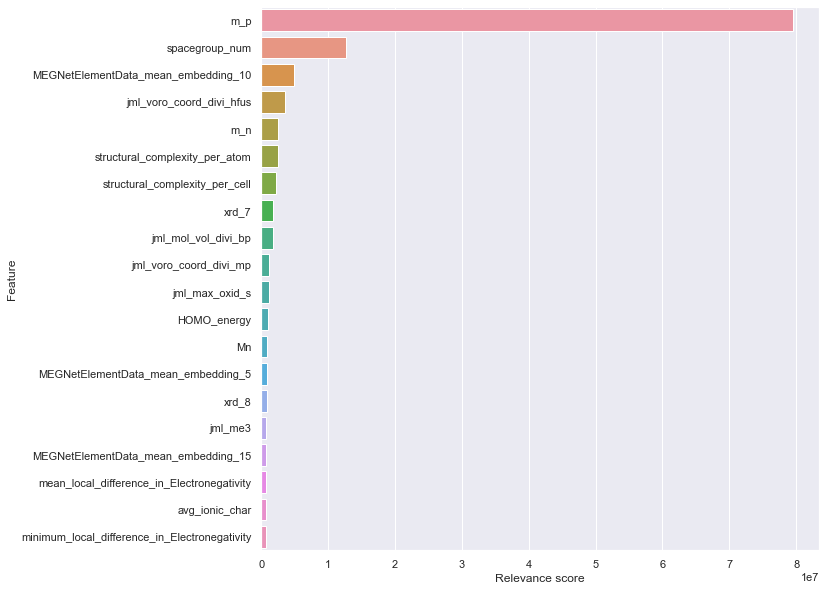

In [13]:
# Obtain feature relevance score
FS.feature_relevance(
                    plot = True, 
                    no_of_features = 20
                    )

In [14]:
# Perform recursive feature selection 
FS.recursive_selection(
                    stratify = False, 
                    oversample_technique = None, 
                    chosen_metric = 'rmse',
                    average = 'weighted',
                    no_to_terminate = 200,
                    max_no_imp = 10
                    )

   No. of rows in training set:  5522
No. of features considering:  1

n=1: mae_train=52.8211, mae_validation=72.3475 
n=1: mse_train=4489.8245, mse_validation=8557.4484 
n=1: rmse_train=67.0062, rmse_validation=92.5065 
n=1: r2_train=0.4003, r2_validation=-0.1227 
n=1: max_error_train=359.9894, max_error_validation=325.2343 
--- 0.4133756160736084 seconds --- 

No. of features considering:  2

n=2: mae_train=39.7546, mae_validation=77.0639 
n=2: mse_train=2594.4001, mse_validation=9620.2187 
n=2: rmse_train=50.9353, rmse_validation=98.0827 
n=2: r2_train=0.6535, r2_validation=-0.2622 
n=2: max_error_train=286.7771, max_error_validation=313.2021 
--- 0.3242948055267334 seconds --- 

No. of features considering:  3

n=3: mae_train=29.9685, mae_validation=71.5920 
n=3: mse_train=1500.9189, mse_validation=8300.1813 
n=3: rmse_train=38.7417, rmse_validation=91.1053 
n=3: r2_train=0.7995, r2_validation=-0.0890 
n=3: max_error_train=207.7972, max_error_validation=326.0055 
--- 0.421382427215

,train_mae,va_mae,train_mse,va_mse,train_rmse,va_rmse,train_r_sq,va_r_sq,train_max_error,va_max_error
no_of_features,,,,,,,,,,
1,52.821083,72.347514,4489.824453,8557.448380,67.006152,92.506478,0.400280,-0.122721,359.989356,325.234341
2,39.754601,77.063903,2594.400088,9620.218737,50.935254,98.082714,0.653458,-0.262154,286.777147,313.202146
3,29.968493,71.591976,1500.918855,8300.181273,38.741694,91.105331,0.799517,-0.088968,207.797168,326.005510
4,24.678769,70.522800,1023.548567,8102.549500,31.992946,90.014163,0.863281,-0.063039,176.155557,316.962525
5,20.753843,68.980856,741.824946,7637.931809,27.236464,87.395262,0.900912,-0.002082,156.740603,314.284900
...,...,...,...,...,...,...,...,...,...,...
195,3.110643,62.183057,18.149171,6529.781462,4.260184,80.807063,0.997576,0.143305,42.194966,316.980220
196,3.122856,62.131642,18.199505,6403.177225,4.266088,80.019855,0.997569,0.159916,44.405854,308.561105
197,3.102180,62.526537,18.121636,6454.271038,4.256952,80.338478,0.997579,0.153212,53.095556,328.535303


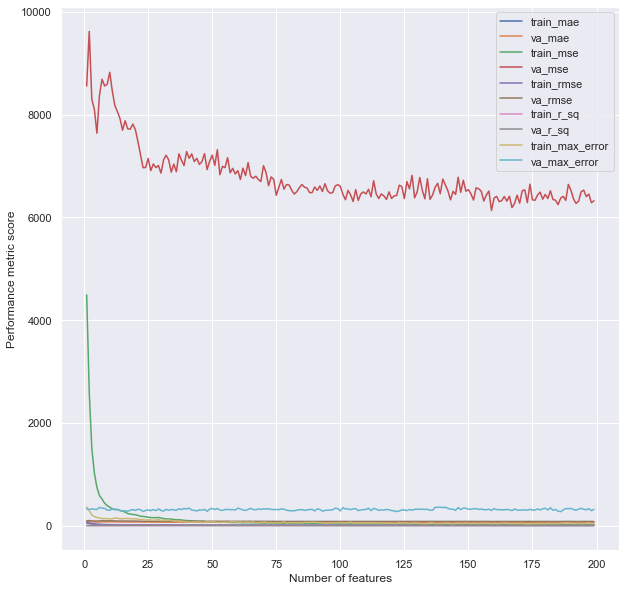

Result saved as: GBFS_convergence_plot_s_p.pkl


<Figure size 720x720 with 0 Axes>

In [15]:
# Plot the result
FS.convergence_plot()

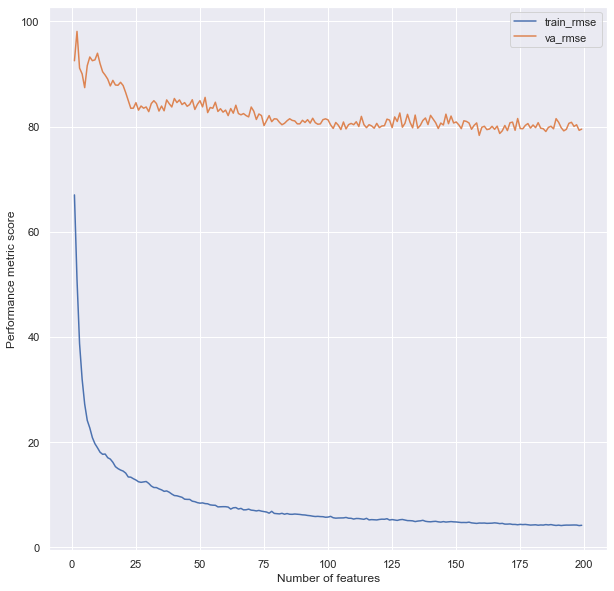

Result saved as: GBFS_convergence_plot_s_p.pkl


<Figure size 720x720 with 0 Axes>

In [16]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_rmse',
                    validation_metric = 'va_rmse'
                    )

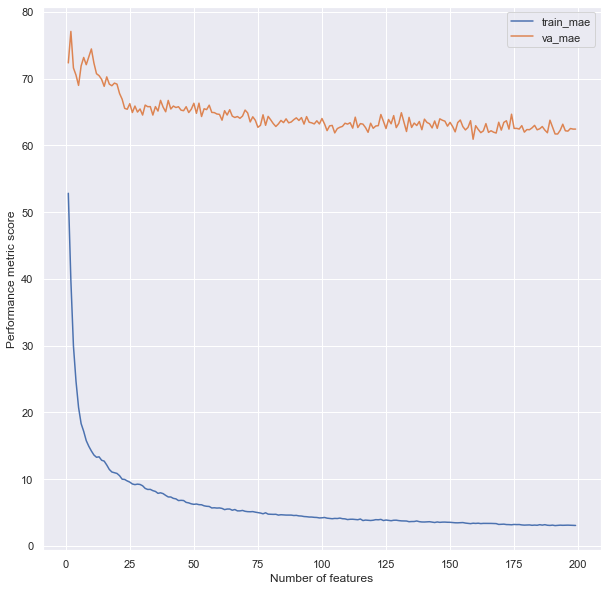

Result saved as: GBFS_convergence_plot_s_p.pkl


<Figure size 720x720 with 0 Axes>

In [17]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_mae',
                    validation_metric = 'va_mae'
                    )

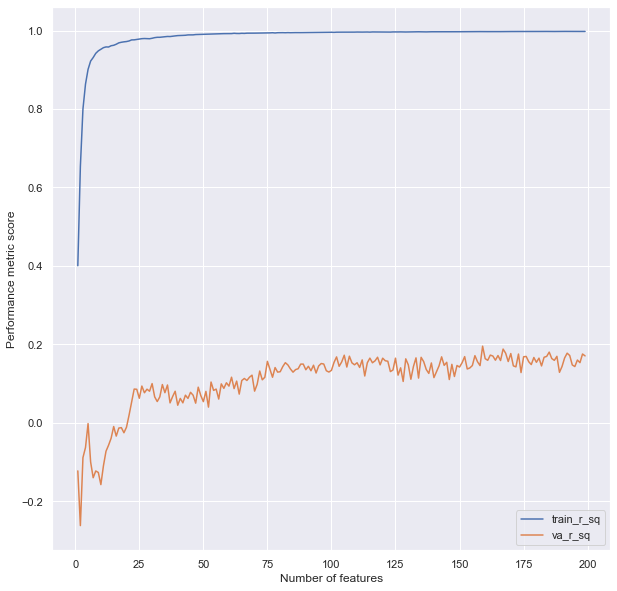

Result saved as: GBFS_convergence_plot_s_p.pkl


<Figure size 720x720 with 0 Axes>

In [18]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_r_sq',
                    validation_metric = 'va_r_sq'
                    )

In [19]:
# # Plot the result
# FS.convergence_plot(
#                     train_metric = ['train_r_sq', 'train_rmse', 'train_mae'],
#                     validation_metric = ['va_r_sq', 'va_rmse', 'va_mae']
#                     )

##### Statistical Analyses - Regression

In [20]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_analyses as fa

import joblib
import pandas as pd
import numpy as np

In [21]:
# Target
target = 's_p'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/3. thermal_electric (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_scaled.pkl'

# Either a list or saved file
features = path + 'features_seebeck.pkl'

problem = 'regression'

In [22]:
# Initialization 
analyses = fa.perform(
                    path_to_file = path_to_file, 
                    path_to_save = path_to_save, 
                    target = target,
                    features = features
                    )

Name of target column:  s_p
No. of exploratory features:  3640


In [23]:
df = analyses.remove_constant_features()
df.head()

No. of features removed:  529


,minimum_oxidation_state,maximum_oxidation_state,range_oxidation_state,std_dev_oxidation_state,max_ionic_char,avg_ionic_char,avg_anion_electron_affinity,minimum_EN_difference,maximum_EN_difference,range_EN_difference,...,crystal_system_ohe_cubic,crystal_system_ohe_hexagonal,crystal_system_ohe_monoclinic,crystal_system_ohe_orthorhombic,crystal_system_ohe_tetragonal,crystal_system_ohe_triclinic,crystal_system_ohe_trigonal,pf_n,pf_p,s_p
5193,0.25,0.500,0.636364,0.526563,0.429704,0.086588,0.818165,0.241263,0.491263,0.413333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.342,0.1500,732.0
6732,1.00,0.000,0.000000,0.000000,0.846198,0.505181,1.000000,0.142473,0.142473,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.723,0.0486,795.0
1592,0.75,0.250,0.272727,0.265606,0.392501,0.361473,0.472710,0.483871,0.502688,0.031111,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.130,0.6200,557.0
6892,0.50,0.250,0.363636,0.250700,0.265772,0.203522,0.420322,0.235215,0.329301,0.155556,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.659,0.1900,661.0
5399,0.50,0.375,0.454545,0.346751,0.211022,0.190933,0.366472,0.284946,0.392473,0.177778,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.590,1.0700,536.0


In [24]:
df_anova = analyses.ANOVA_F_test(
                                problem='regression', 
                                all_features=False, 
                                csv=False
                                )

df_anova

There are:
No. of categorical features:  169
No. of numerical features:  2943 

Considering only the numerical features. 

Result saved as:  ANOVA_F_test_result_s_p_regression.pkl


,feature_names,f_statistic,f_statistic_scaled
0,MagpieData_maximum_Electronegativity,1.700750e+03,1.000000e+00
1,PymatgenData_maximum_X,1.700750e+03,1.000000e+00
2,MEGNetElementData_minimum_embedding_10,1.470903e+03,8.648553e-01
3,DemlData_minimum_boiling_point,1.403141e+03,8.250132e-01
4,PymatgenData_mean_row,1.334478e+03,7.846409e-01
...,...,...,...
2938,jml_mean_charge_239,6.219729e-05,3.635907e-08
2939,OFM_d5__d3,4.645838e-05,2.710497e-08
2940,jml_adf2_29,1.982970e-05,1.144795e-08
2941,xrd_36,7.878611e-06,4.420994e-09


In [25]:
df_mi = analyses.mutual_information(
                                problem='regression', 
                                csv=False
                                )

df_mi

There are:
No. of categorical features:  169
No. of numerical features:  2943 

Result saved as: MI_result_s_p.pkl


,feature_names,MI,MI_scaled
0,jml_first_ion_en_divi_bp,0.151283,1.000000
1,jml_first_ion_en_divi_mp,0.146874,0.970859
2,jml_first_ion_en_divi_polzbl,0.144579,0.955686
3,jml_first_ion_en_divi_therm_cond,0.143659,0.949608
4,jml_atom_mass_divi_therm_cond,0.138965,0.918579
...,...,...,...
2848,OFM_d5__d3,0.000000,0.000000
2847,OFM_d5__d2,0.000000,0.000000
2846,OFM_d5__d10,0.000000,0.000000
2845,OFM_d5__d1,0.000000,0.000000


#### Feature Engineering 

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_engineering as fe

import joblib
import pandas as pd
import numpy as np

In [2]:
# Target
target = 's_p'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/3. thermal_electric (done)/'
path_to_save = path + target + '_results/'
path_to_file = path + 'boltztrap_mp_merged_s_p.pkl'  # all data

# Either a list or saved file for the features
features = path + 'features_seebeck.pkl'

problem = 'regression'

In [3]:
# Top n features from ANOVA 
df_anova = joblib.load(path_to_save + 'ANOVA_F_test_result_' + target + '_regression.pkl')

# Top n features
n = 5
anova_features = df_anova['feature_names'].tolist()[:n]

df_anova.iloc[:n, :]

,feature_names,f_statistic,f_statistic_scaled
0,MagpieData_maximum_Electronegativity,1700.749948,1.000000
1,PymatgenData_maximum_X,1700.749948,1.000000
2,MEGNetElementData_minimum_embedding_10,1470.902620,0.864855
3,DemlData_minimum_boiling_point,1403.141234,0.825013
4,PymatgenData_mean_row,1334.477965,0.784641


In [4]:
# Top n features from MI 
df_mi = joblib.load(path_to_save + 'MI_result_' + target + '.pkl')

# Top n features
n = 5
mi_features = df_mi['feature_names'].tolist()[:n]

df_mi.iloc[:n, :]

,feature_names,MI,MI_scaled
0,jml_first_ion_en_divi_bp,0.151283,1.000000
1,jml_first_ion_en_divi_mp,0.146874,0.970859
2,jml_first_ion_en_divi_polzbl,0.144579,0.955686
3,jml_first_ion_en_divi_therm_cond,0.143659,0.949608
4,jml_atom_mass_divi_therm_cond,0.138965,0.918579


In [5]:
# Top n features from GBFS
df_gbfs = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')

# Top n features
n = 5
gbfs_features = df_gbfs['feature'].tolist()[:n]

df_gbfs.iloc[:n, :]

,feature,relevance_score
0,m_p,7.943723e+07
1,spacegroup_num,1.276166e+07
2,MEGNetElementData_mean_embedding_10,4.925311e+06
3,jml_voro_coord_divi_hfus,3.632040e+06
4,m_n,2.539492e+06


In [6]:
# Initialization
perform = fe.engineering(
                        path_to_file = path_to_file, 
                        path_to_save = path_to_save, 
                        target = target,
                        features = features
                        )

Name of target column:  s_p
No. of exploratory features:  3640


In [7]:
# Join the features
feature_list = anova_features + mi_features + gbfs_features

print(len(feature_list))
print(feature_list)

15
['MagpieData_maximum_Electronegativity', 'PymatgenData_maximum_X', 'MEGNetElementData_minimum_embedding_10', 'DemlData_minimum_boiling_point', 'PymatgenData_mean_row', 'jml_first_ion_en_divi_bp', 'jml_first_ion_en_divi_mp', 'jml_first_ion_en_divi_polzbl', 'jml_first_ion_en_divi_therm_cond', 'jml_atom_mass_divi_therm_cond', 'm_p', 'spacegroup_num', 'MEGNetElementData_mean_embedding_10', 'jml_voro_coord_divi_hfus', 'm_n']


In [8]:
# Perform feature engineering
df, new_cols = perform.brute_force(feature_list = feature_list)

df.head()

,minimum_oxidation_state,maximum_oxidation_state,range_oxidation_state,std_dev_oxidation_state,compound_possible,max_ionic_char,avg_ionic_char,avg_anion_electron_affinity,minimum_EN_difference,maximum_EN_difference,...,jml_voro_coord_divi_hfus/spacegroup_num,spacegroup_num/m_n,m_n/spacegroup_num,MEGNetElementData_mean_embedding_10/jml_voro_coord_divi_hfus,jml_voro_coord_divi_hfus/MEGNetElementData_mean_embedding_10,MEGNetElementData_mean_embedding_10/m_n,m_n/MEGNetElementData_mean_embedding_10,jml_voro_coord_divi_hfus/m_n,m_n/jml_voro_coord_divi_hfus,s_p
0,-2,5,7,3.951631,1,0.803211,0.108118,-282000.0,1.25,2.55,...,21.542753,32.871972,0.030421,-0.000735,-1359.812880,-0.520772,-1.920225,708.152772,0.001412,760.0
1,-2,3,5,2.645751,1,0.851088,0.178743,-364000.0,2.06,2.06,...,4.396765,238.447320,0.004194,-0.000471,-2122.090381,-0.494040,-2.024129,1048.396780,0.000954,567.0
2,-3,3,6,2.770274,1,0.327599,0.073868,-216000.0,0.38,1.26,...,0.994006,688.888889,0.001452,-0.000386,-2588.178697,-0.264572,-3.779691,684.759347,0.001460,471.0
3,-1,3,4,2.070197,1,0.894601,0.188900,-328000.0,2.37,3.00,...,3.028505,297.445255,0.003362,-0.000768,-1302.038475,-0.691849,-1.445402,900.814386,0.001110,871.0
4,-3,4,7,3.605551,1,0.000025,0.000003,-144000.0,-0.01,-0.01,...,2.005414,12.068966,0.082857,0.001854,539.238851,0.044884,22.279583,24.203274,0.041317,510.0


In [9]:
perform.save()

Result saved as: df_s_p_engineered_features.pkl
Result saved as: features_s_p_engineered.pkl
Result saved as: df_train_s_p_engineered.pkl
Result saved as: df_test_s_p_engineered.pkl


#### Multi-Collinearity Reduction

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import multicollinearity_reduction as mr

import joblib
import pandas as pd
import numpy as np

In [2]:
# Target
target = 's_p'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/3. thermal_electric (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Features 
n = 200 # Most relevant features defined using the GBFS result

gbfs_cols = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')['feature'].tolist()[:n]
new_cols = joblib.load(path_to_save + 'features_' + target + '_engineered.pkl')
features = gbfs_cols + new_cols

problem = 'regression'

print(len(gbfs_cols))
print(len(new_cols))
len(features)

200
210


410

In [3]:
# Initialize module with path_to_file and path_to_save
data = mr.multicollinearity_reduction(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features 
                                        )

Name of target column:  s_p
No. of exploratory features:  410


In [4]:
# Remove features with correlation coeff greather than the threshold
col_corr = data.correlation_analysis(threshold = 0.85)
new_features = data.apply_correlation_filter()

Identified correlated features
No. of features remaining:  221
Features saved as: features_selected_from_correlation_analysis_s_p.pkl


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Figure saved as: Dendrogram_s_p.png


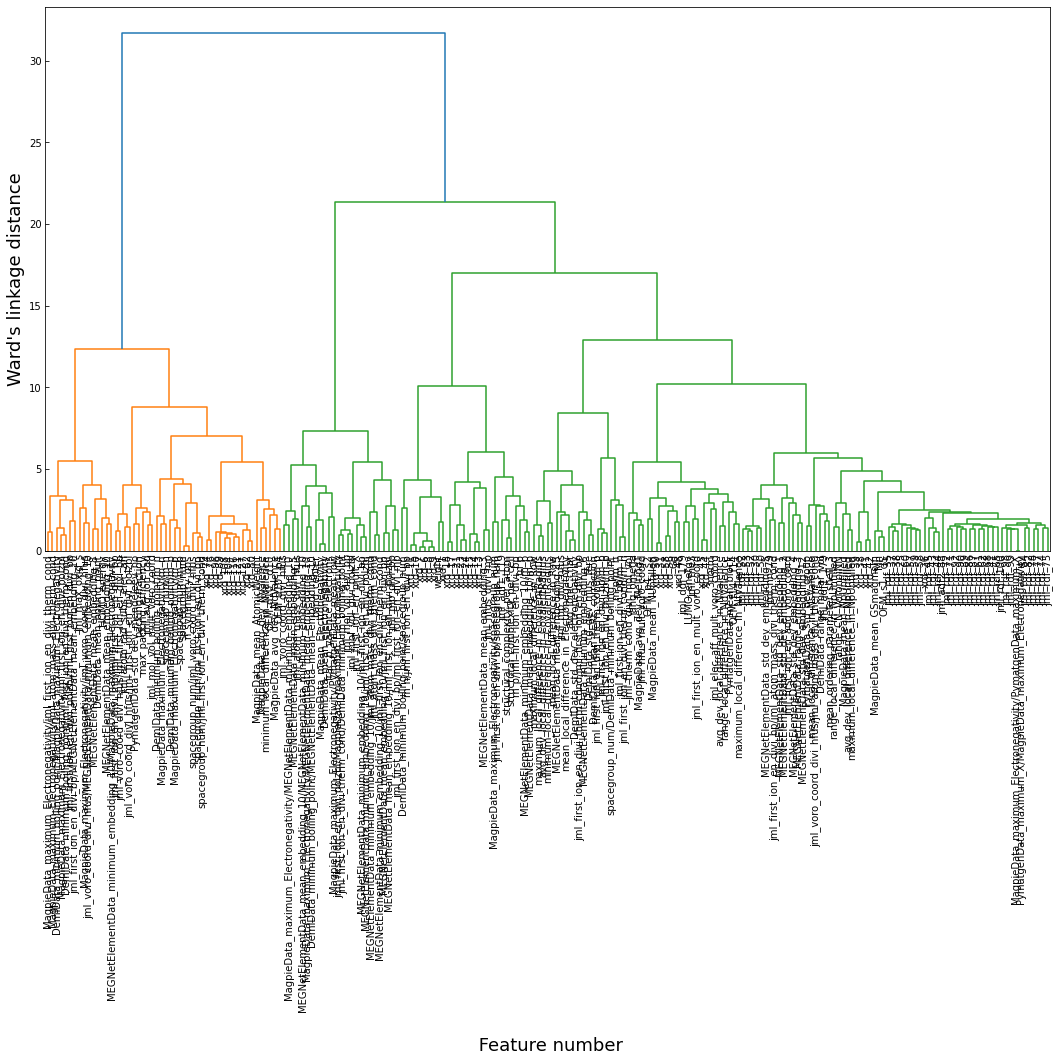

In [5]:
# Perform hierarchical cluster analysis & create the corresponding dendrogram 
data.hierarchical_cluster_analysis()

In [6]:
# Select features based on the given linkage threshold
threshold_list = [1, 2, 3, 4, 5]

for i in threshold_list:
    final_features = data.apply_linkage_threshold(threshold = i)

Number of features remaining:  190
Features saved as features_selected_from_hierarchical_analysis_s_p_threshold_1.pkl
Number of features remaining:  96
Features saved as features_selected_from_hierarchical_analysis_s_p_threshold_2.pkl
Number of features remaining:  52
Features saved as features_selected_from_hierarchical_analysis_s_p_threshold_3.pkl
Number of features remaining:  34
Features saved as features_selected_from_hierarchical_analysis_s_p_threshold_4.pkl
Number of features remaining:  21
Features saved as features_selected_from_hierarchical_analysis_s_p_threshold_5.pkl


In [7]:
# threshold_list = np.linspace(3, 4, 6)

# for i in threshold_list:
#     final_features = data.apply_linkage_threshold(threshold = i)

#### Recursive Feature Elimination

In [8]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import recursive_feature_elimination as rfe

import joblib
import pandas as pd

In [9]:
# Target
target = 's_p'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/3. thermal_electric (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_2.pkl')

scaled = False

problem = 'regression'

In [10]:
# Initialize module with path_to_file and path_to_save
run = rfe.recursive_feature_elimination(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features,
                                        scaled = False,
                                        problem = problem
                                        )

Target: s_p
No. of features: 96


In [11]:
# Run RFE
estimator = run.base_model(boosting_method = 'lightGBM')
RFE_features = run.perform()

Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 fe

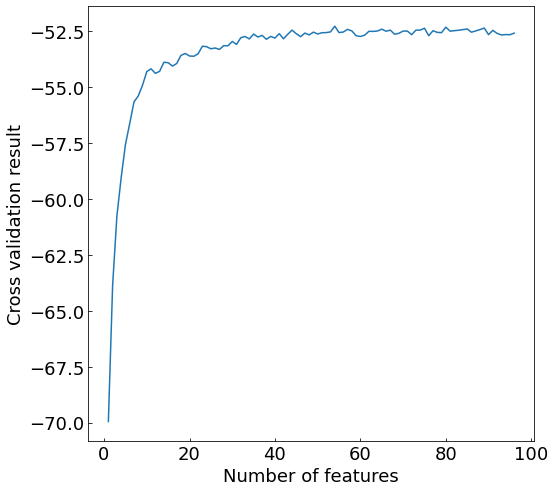

Figure saved as: RFE_plot_s_p.png


In [12]:
# Plot figure
run.RFE_plot()

#### Test Dummy Model

In [1]:
### test result to find best threshold

import pandas as pd
import numpy as np
import joblib
import statsmodels.api as sm
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, max_error
from sklearn.metrics import explained_variance_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from lightgbm.sklearn import LGBMRegressor

In [2]:
# Target
target = 's_p'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/3. thermal_electric (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Data
df_train = joblib.load(path_to_save + 'df_train_' + target + '_engineered.pkl')
df_test = joblib.load(path_to_save + 'df_test_' + target + '_engineered.pkl')

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_2.pkl')
scaled = False
print('No. of features:', len(features))

problem = 'regression'

No. of features: 96


In [3]:
# Scale the features
scaling = MinMaxScaler(feature_range=(0, 1))

df_train[features] = pd.DataFrame(
                                    scaling.fit_transform(df_train[features].values),
                                    columns=df_train[features].columns,
                                    index=df_train[features].index
                                )
                                

df_test[features] = pd.DataFrame(
                                    scaling.transform(df_test[features].values),
                                    columns=df_test[features].columns,
                                    index=df_test[features].index
                                )

In [4]:
lgbm = LGBMRegressor(
                    boosting_type ='gbdt',
                    objective='regression',
                    importance_type='gain',
                    learning_rate=0.1,
                    n_estimators=350,
                    num_leaves=40,
                    max_depth=-1,
                    random_state=42
                    )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMRegressor(importance_type='gain', n_estimators=350, num_leaves=40,
              objective='regression', random_state=42)

In [5]:
# Predict
predicted_target = lgbm.predict(df_test[features])

# Generate table of results
id_index = df_test.index.tolist()

df_pred = pd.DataFrame({'task_id': id_index,
                        'act_lambda_max': df_test[target].values.reshape(1, -1).ravel(),
                        'pred_lambda_max': predicted_target
                        })

# Eliminate zeros (?)
df_pred['adj_pred_lambda_max'] = df_pred['pred_lambda_max']
df_pred['adj_pred_lambda_max'] = df_pred['adj_pred_lambda_max'].apply(lambda x: 0 if x < 0 else x)

# Define variables
y_test = df_pred['act_lambda_max']
y_pred_adj = df_pred['adj_pred_lambda_max']
y_pred = df_pred['pred_lambda_max']

In [6]:
print('Max value:', df_test[target].max())
print('Min value:', df_test[target].min())

Max value: 940.0
Min value: 405.0


In [7]:
def plot(df_pred, adj=True):
        # Plot results
        max_value = 1075
        min_value = 300

        X = df_pred['act_lambda_max']
        if adj is True:
                Y = df_pred['adj_pred_lambda_max']
        else:
                Y = df_pred['pred_lambda_max']

        # Stats
        results = sm.OLS(Y,sm.add_constant(X)).fit()
        print(results.summary())

        # Figure
        fig = plt.figure(figsize=(10, 10)) #, dpi=100, facecolor='w', edgecolor='k')
        gs = GridSpec(4, 4)

        ax_scatter = fig.add_subplot(gs[1:4, 0:3])
        ax_hist_y = fig.add_subplot(gs[0,0:3])
        ax_hist_x = fig.add_subplot(gs[1:4, 3])


        fontsize = 18

        # Predicted vs Actual
        ax_scatter.plot(X, Y, 'o', markersize=6, color='black', alpha=0.1)

        # line of best fit
        offset = 50
        linear_fit = np.linspace(min_value+offset, max_value-offset, max_value)
        ax_scatter.plot(linear_fit, linear_fit*results.params[1] + results.params[0], '-.', color='tab:blue', alpha=0.7)

        # Ideal y=x 
        y = x = np.linspace(min_value+offset, max_value-offset, max_value)
        ax_scatter.plot(x, y, '--', color='red', alpha=0.7)

        ticks = np.linspace(min_value, max_value, 6)

        onset = 20
        ax_scatter.set_xlabel('DFT Calculation of p-type Seebeck Coeff. (\u03BCV per K)', fontsize=fontsize)
        ax_scatter.set_ylabel('ML Prediction of p-type Seebeck Coeff. (\u03BCV per K)', fontsize=fontsize)
        ax_scatter.tick_params(axis='both', which='both', labelsize=fontsize, direction="in")
        ax_scatter.set_xlim(min_value-onset, max_value+onset)
        ax_scatter.set_ylim(min_value-onset, max_value+onset)
        ax_scatter.set_xticks(ticks)
        ax_scatter.set_yticks(ticks)
        # ax_scatter.set_yscale('log')
        # ax_scatter.set_xscale('log')

        ax_hist_x.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelleft=False)
        ax_hist_x.set_xlabel('Count', fontsize=fontsize)
        ax_hist_x.set_ylim(min_value-onset, max_value+onset)
        ax_hist_x.set_xticks([0, 40, 80])
        ax_hist_x.set_yticks(ticks)

        ax_hist_y.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelbottom=False)
        ax_hist_y.set_ylabel('Count', fontsize=fontsize)
        ax_hist_y.set_xlim(min_value-onset, max_value+onset)
        ax_hist_y.set_yticks([0, 40, 80])
        ax_hist_y.set_xticks(ticks)

        # Distribution plots
        alpha = 0.4
        histtype = 'bar' #'step' bar
        color = 'black' #'tab:grey'
        bins = 60 #70

        if adj is True:
                ax_hist_y.hist(
                                y_pred_adj, 
                                bins=bins, 
                                color=color, 
                                histtype=histtype,
                                alpha=alpha
                                )
        else:
                ax_hist_y.hist(
                                y_pred, 
                                bins=bins, 
                                color=color, 
                                histtype=histtype,
                                alpha=alpha
                                )

        ax_hist_x.hist(
                        y_test, 
                        orientation='horizontal', 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )


        #Text in figure
        font1 = {'family': 'DejaVu Sans',
                'color':  'red',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font2 = {'family': 'DejaVu Sans',
                'color':  'tab:blue',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font3 = {'family': 'DejaVu Sans', #'serif',
                'color':  'black',
                'weight': 'normal',
                'size': fontsize-3,
                }

        ax_scatter.text(770, 870, r'$y = x$', fontdict=font1)
        ax_scatter.text(850, 725, r'$y = ' + str(round(results.params[1],1)) + 'x - ' + str(round(results.params[0],1)) + '$', fontdict=font2)

        r2 = r2_score(X, Y)
        
        x_label_pos = 770
        y_label_pos = 300
        ax_scatter.text(x_label_pos, y_label_pos+70, r'$R^{2}$ = ' + str(round(r2,2)) + ' \u03BCV/K', fontdict=font3)

        mae = mean_absolute_error(X, Y)
        ax_scatter.text(x_label_pos, y_label_pos+36, r'$MAE$ = ' + str(round(mae,2)) + ' \u03BCV/K', fontdict=font3)

        mse = mean_squared_error(X, Y, squared=False)
        ax_scatter.text(x_label_pos, y_label_pos, r'$RMSE$ = ' + str(round(mse,2)) + ' \u03BCV/K', fontdict=font3)

        #final_figure
        #fig.savefig('final_regression_mag_v1.png', dpi = 500, bbox_inches="tight")

        plt.show()

        print('m = ', results.params[1])
        print('c = ', results.params[0], '\n')

        print('MAE: ', mean_absolute_error(X, Y))
        print('MSE: ', mean_squared_error(X, Y))
        print('RMSE: ', mean_squared_error(X, Y, squared=False))
        print('R-squared: ', r2_score(X, Y))
        print('Max error: ', max_error(X, Y))
        print('Explained_variance_score: ', explained_variance_score(X, Y, multioutput='variance_weighted'))

                            OLS Regression Results                            
Dep. Variable:        pred_lambda_max   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     3496.
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:42:29   Log-Likelihood:                -8915.9
No. Observations:                1726   AIC:                         1.784e+04
Df Residuals:                    1724   BIC:                         1.785e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            220.7622      8.096     27.

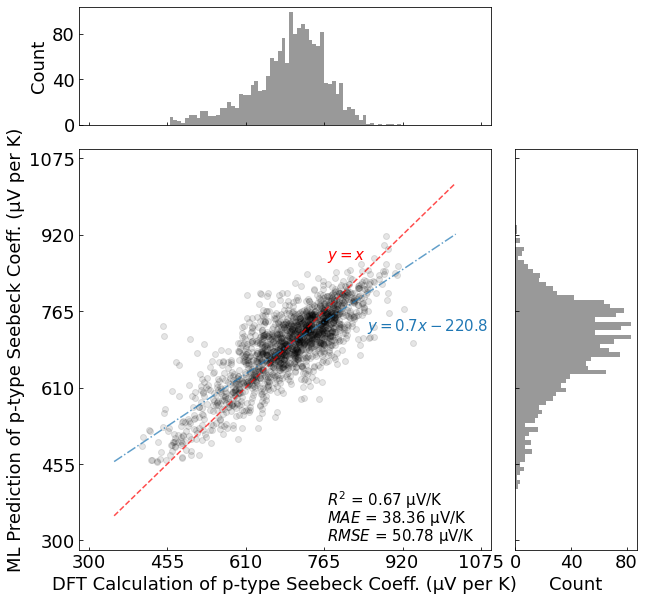

m =  0.6834167210494216
c =  220.76216646636945 

MAE:  38.35695150980799
MSE:  2578.3432279598105
RMSE:  50.77738894389717
R-squared:  0.6693857083460654
Max error:  289.55746983813094
Explained_variance_score:  0.6694625670742351


In [8]:
plot(df_pred, adj=False)

[Text(0.5, 0, 'Relevance score'), Text(0, 0.5, 'Feature')]

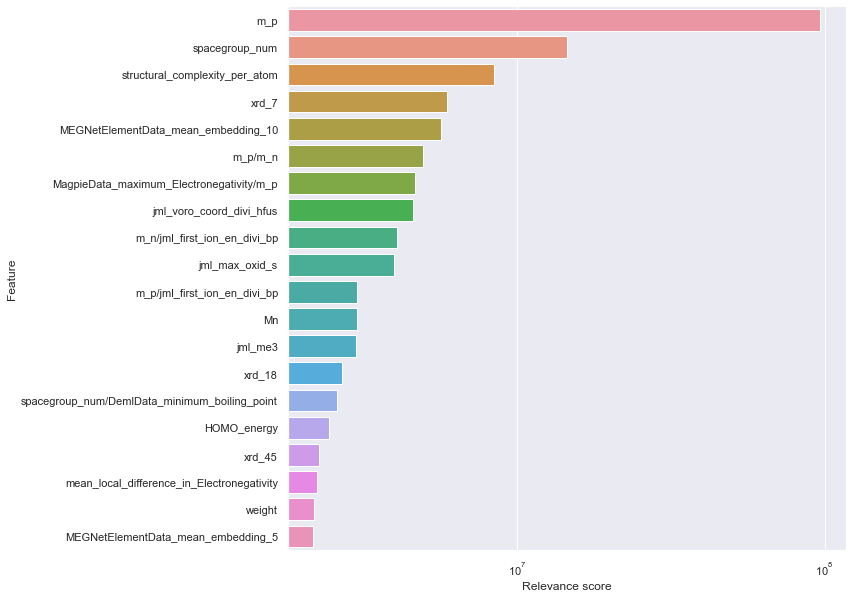

In [9]:
import seaborn as sns

# Generate feature ranking
model = lgbm

feature_score = pd.DataFrame({'feature': features, 'relevance_score': model.feature_importances_})
feature_score = feature_score.sort_values(by = 'relevance_score', ascending = False)
feature_score = feature_score.reset_index(drop = True)


#Plot data of feature relevance 
sns.set(rc = {'figure.figsize':(10, 10)})

# Number of features to plot
no_of_features = 20

fig = sns.barplot(x = 'relevance_score', y = 'feature', data = feature_score[:no_of_features])
fig.set_xscale("log")
fig.set(xlabel = 'Relevance score', ylabel = 'Feature')

#### Bayesian Optimization 

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import optimization as opt

import joblib
import pandas as pd
import numpy as np

In [2]:
# Target
target = 's_p'

# Path
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/3. thermal_electric (done)/'
path_to_save = path + target + '_results/'

# Path to training data
path_to_train_data = path_to_save + 'df_train_' + target + '_engineered.pkl'
path_to_test_data = path_to_save + 'df_test_' + target + '_engineered.pkl'

path_to_features = path_to_save + 'features_selected_from_RFE_' + target + '.pkl' 

problem = 'regression'

scaled = False

In [3]:
# Initialization
final_stage = opt.optimization(
                            path_to_train_data = path_to_train_data,
                            path_to_test_data = path_to_test_data,
                            path_to_save = path_to_save,
                            features = path_to_features,
                            target = target,
                            problem = problem,
                            scaled = scaled
                            )

Name of target column:  s_p
No. of exploratory features:  54


In [4]:
# Choose ML model
final_stage.base_model(boosting_method = 'lightGBM')

LGBMRegressor(importance_type='gain', random_state=42)

In [5]:
# Define hyperparameters; range should be edited directly from the script
final_stage.set_hyperparameters()

(['learning_rate', 'n_estimators', 'num_leaves'],
 [Real(low=0.01, high=1.0, prior='log-uniform', transform='identity'),
  Integer(low=100, high=800, prior='uniform', transform='identity'),
  Integer(low=10, high=100, prior='uniform', transform='identity')])

In [6]:
# optimization_method: dummy_minimize, gp_minimize, gbrt_minimize, forest_minimize
final_stage.run(optimization_method = 'bayesian')

Iteration No: 1 started. Evaluating function at random point.

 {'learning_rate': 0.17573331720602908, 'n_estimators': 320, 'num_leaves': 21} 

Score:  53.35325539268791 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 2.7637
Function value obtained: 53.3533
Current minimum: 53.3533
Iteration No: 2 started. Evaluating function at random point.

 {'learning_rate': 0.26790068538591433, 'n_estimators': 311, 'num_leaves': 22} 

Score:  54.45575719362836 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 1.8960
Function value obtained: 54.4558
Current minimum: 53.3533
Iteration No: 3 started. Evaluating function at random point.

 {'learning_rate': 0.011050746996427602, 'n_estimators': 418, 'num_leaves': 38} 

Score:  53.06828213129978 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 3.2336
Function value obtained: 53.0683
Current minimum: 53.0683
Iteration No: 4 started. Evaluating function at random point.

 {'learning_rate': 0.

Saved: Optimisation_result_s_p.png


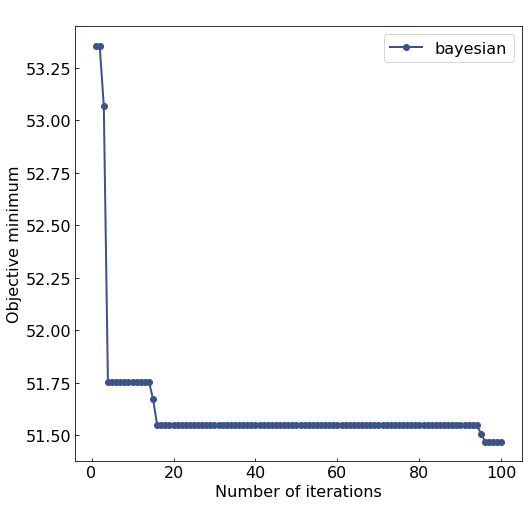

In [7]:
# Plot convergence plot
final_stage.convergence_plot()

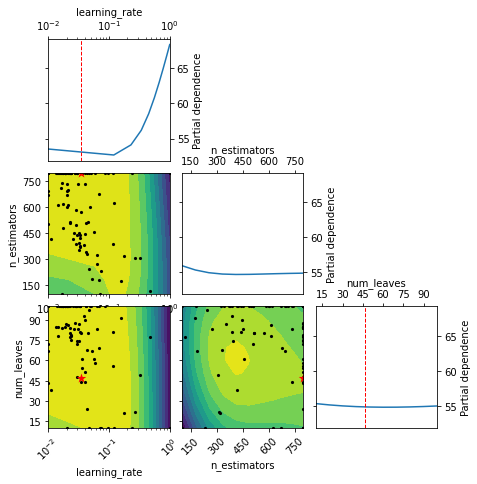

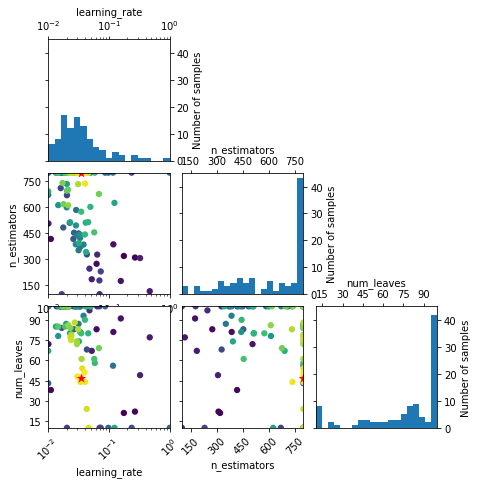

In [8]:
# objective and evaluation plot
final_stage.objective_plot()

In [9]:
# Train model with optimal hyperparameter identified
final_stage.train_model()

LGBMRegressor(importance_type='gain', learning_rate=0.034852210899212754,
              n_estimators=800, num_leaves=47, random_state=42)

                            OLS Regression Results                            
Dep. Variable:            pred_target   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     3726.
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        12:46:39   Log-Likelihood:                -8842.7
No. Observations:                1726   AIC:                         1.769e+04
Df Residuals:                    1724   BIC:                         1.770e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        225.4759      7.760     29.056      0.0

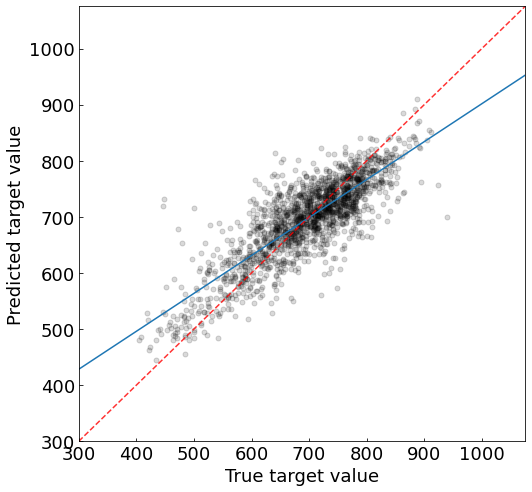

Saved: regression_plot_s_p.png


In [10]:
# Evaluate model using test set
final_stage.evaluate(
                    strategy = 'weighted', 
                    adjusted = False, 
                    max_value = 1075,
                    min_value = 300
                    )


### Final Figure

In [1]:
import pandas as pd
import numpy as np
import joblib
import statsmodels.api as sm
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, max_error
from sklearn.metrics import explained_variance_score,mean_squared_error

from lightgbm.sklearn import LGBMRegressor

In [2]:
# Target
target = 's_p'

# Path
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/3. thermal_electric (done)/'
path_to_save = path + target + '_results/'

# Features
features = joblib.load(path_to_save + 'features_selected_from_RFE_' + target + '.pkl')
print(len(features))

# Path to training data
df_train = joblib.load(path_to_save + 'df_train_' + target + '_engineered.pkl')
df_test = joblib.load(path_to_save + 'df_test_' + target + '_engineered.pkl')

problem = 'regression'

scaled = False

54


In [3]:
lgbm = LGBMRegressor(
                    boosting_type ='gbdt',
                    objective=problem,
                    importance_type='gain',
                    learning_rate=0.034852210899212754,
                    n_estimators=800,
                    num_leaves=47,
                    max_depth=-1,
                    random_state=42
                    )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMRegressor(importance_type='gain', learning_rate=0.034852210899212754,
              n_estimators=800, num_leaves=47, objective='regression',
              random_state=42)

In [4]:
# Predict
predicted_target = lgbm.predict(df_test[features])

# Generate table of results
id_index = df_test.index.tolist()

df_pred = pd.DataFrame({'task_id': id_index,
                        'act_lambda_max': df_test[target].values.reshape(1, -1).ravel(),
                        'pred_lambda_max': predicted_target
                        })
df_pred['adj_pred_lambda_max'] = df_pred['pred_lambda_max']
df_pred['adj_pred_lambda_max'] = df_pred['adj_pred_lambda_max'].apply(lambda x: 0 if x < 0 else x)

# Define variables
y_test = df_pred['act_lambda_max']
y_pred_adj = df_pred['adj_pred_lambda_max']
y_pred = df_pred['pred_lambda_max']

In [5]:
print('Max value:', df_test[target].max())
print('Min value:', df_test[target].min())

Max value: 940.0
Min value: 405.0


In [6]:
def plot(df_pred, adj=True):
        # Plot results
        max_value = 1075
        min_value = 300

        X = df_pred['act_lambda_max']
        if adj is True:
                Y = df_pred['adj_pred_lambda_max']
        else:
                Y = df_pred['pred_lambda_max']

        # Stats
        results = sm.OLS(Y,sm.add_constant(X)).fit()
        print(results.summary())

        # Figure
        fig = plt.figure(figsize=(10, 10)) #, dpi=100, facecolor='w', edgecolor='k')
        gs = GridSpec(4, 4)

        ax_scatter = fig.add_subplot(gs[1:4, 0:3])
        ax_hist_y = fig.add_subplot(gs[0,0:3])
        ax_hist_x = fig.add_subplot(gs[1:4, 3])


        fontsize = 18

        # Predicted vs Actual
        ax_scatter.plot(X, Y, 'o', markersize=6, color='black', alpha=0.1)

        # line of best fit
        offset = 50
        linear_fit = np.linspace(min_value+offset, max_value-offset, max_value)
        ax_scatter.plot(linear_fit, linear_fit*results.params[1] + results.params[0], '-.', color='tab:blue', alpha=0.7)

        # Ideal y=x 
        y = x = np.linspace(min_value+offset, max_value-offset, max_value)
        ax_scatter.plot(x, y, '--', color='red', alpha=0.7)

        ticks = np.linspace(min_value, max_value, 6)

        onset = 20
        ax_scatter.set_xlabel('DFT Calculation of p-type Seebeck Coeff. (\u03BCV per K)', fontsize=fontsize)
        ax_scatter.set_ylabel('ML Prediction of p-type Seebeck Coeff. (\u03BCV per K)', fontsize=fontsize)
        ax_scatter.tick_params(axis='both', which='both', labelsize=fontsize, direction="in")
        ax_scatter.set_xlim(min_value-onset, max_value+onset)
        ax_scatter.set_ylim(min_value-onset, max_value+onset)
        ax_scatter.set_xticks(ticks)
        ax_scatter.set_yticks(ticks)
        # ax_scatter.set_yscale('log')
        # ax_scatter.set_xscale('log')

        ax_hist_x.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelleft=False)
        ax_hist_x.set_xlabel('Count', fontsize=fontsize)
        ax_hist_x.set_ylim(min_value-onset, max_value+onset)
        ax_hist_x.set_xticks([0, 40, 80])
        ax_hist_x.set_yticks(ticks)

        ax_hist_y.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelbottom=False)
        ax_hist_y.set_ylabel('Count', fontsize=fontsize)
        ax_hist_y.set_xlim(min_value-onset, max_value+onset)
        ax_hist_y.set_yticks([0, 40, 80])
        ax_hist_y.set_xticks(ticks)

        # Distribution plots
        alpha = 0.4
        histtype = 'bar' #'step' bar
        color = 'black' #'tab:grey'
        bins = 60 #70

        if adj is True:
                ax_hist_y.hist(
                                y_pred_adj, 
                                bins=bins, 
                                color=color, 
                                histtype=histtype,
                                alpha=alpha
                                )
        else:
                ax_hist_y.hist(
                                y_pred, 
                                bins=bins, 
                                color=color, 
                                histtype=histtype,
                                alpha=alpha
                                )

        ax_hist_x.hist(
                        y_test, 
                        orientation='horizontal', 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )


        #Text in figure
        font1 = {'family': 'DejaVu Sans',
                'color':  'red',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font2 = {'family': 'DejaVu Sans',
                'color':  'tab:blue',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font3 = {'family': 'DejaVu Sans', #'serif',
                'color':  'black',
                'weight': 'normal',
                'size': fontsize-3,
                }

        ax_scatter.text(770, 870, r'$y = x$', fontdict=font1)
        ax_scatter.text(850, 725, r'$y = ' + str(round(results.params[1],1)) + 'x - ' + str(round(results.params[0],1)) + '$', fontdict=font2)

        r2 = r2_score(X, Y)
        
        x_label_pos = 770
        y_label_pos = 300
        ax_scatter.text(x_label_pos, y_label_pos+70, r'$R^{2}$ = ' + str(round(r2,2)) + ' \u03BCV/K', fontdict=font3)

        mae = mean_absolute_error(X, Y)
        ax_scatter.text(x_label_pos, y_label_pos+36, r'$MAE$ = ' + str(round(mae,2)) + ' \u03BCV/K', fontdict=font3)

        mse = mean_squared_error(X, Y, squared=False)
        ax_scatter.text(x_label_pos, y_label_pos, r'$RMSE$ = ' + str(round(mse,2)) + ' \u03BCV/K', fontdict=font3)

        #final_figure
        #fig.savefig('final_regression_mag_v1.png', dpi = 500, bbox_inches="tight")

        plt.show()

        print('m = ', results.params[1])
        print('c = ', results.params[0], '\n')

        print('MAE: ', mean_absolute_error(X, Y))
        print('MSE: ', mean_squared_error(X, Y))
        print('RMSE: ', mean_squared_error(X, Y, squared=False))
        print('R-squared: ', r2_score(X, Y))
        print('Max error: ', max_error(X, Y))
        print('Explained_variance_score: ', explained_variance_score(X, Y, multioutput='variance_weighted'))

                            OLS Regression Results                            
Dep. Variable:        pred_lambda_max   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     3690.
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:43:19   Log-Likelihood:                -8845.4
No. Observations:                1726   AIC:                         1.769e+04
Df Residuals:                    1724   BIC:                         1.771e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            227.3033      7.772     29.

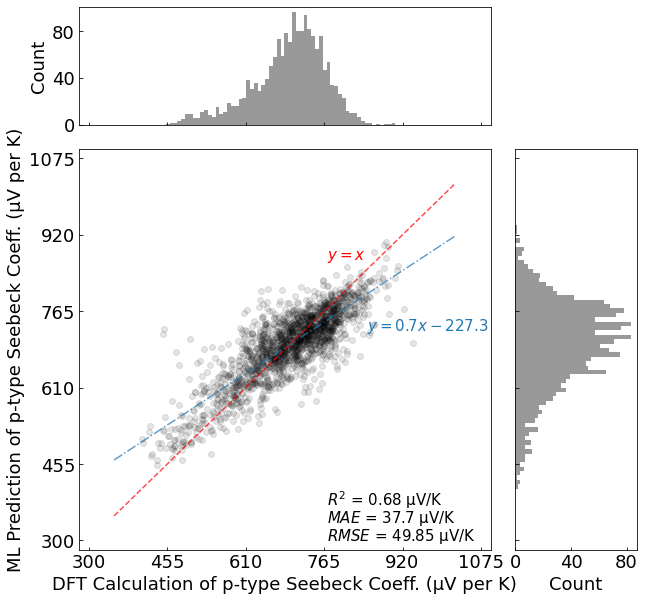

m =  0.6740097864816155
c =  227.30329697316256 

MAE:  37.70396258610721
MSE:  2484.6994963377124
RMSE:  49.846760138826596
R-squared:  0.6813934021481699
Max error:  280.2517937098505
Explained_variance_score:  0.6814711415277646


In [7]:
plot(df_pred, adj=False)

[Text(0.5, 0, 'Relevance score'), Text(0, 0.5, 'Feature')]

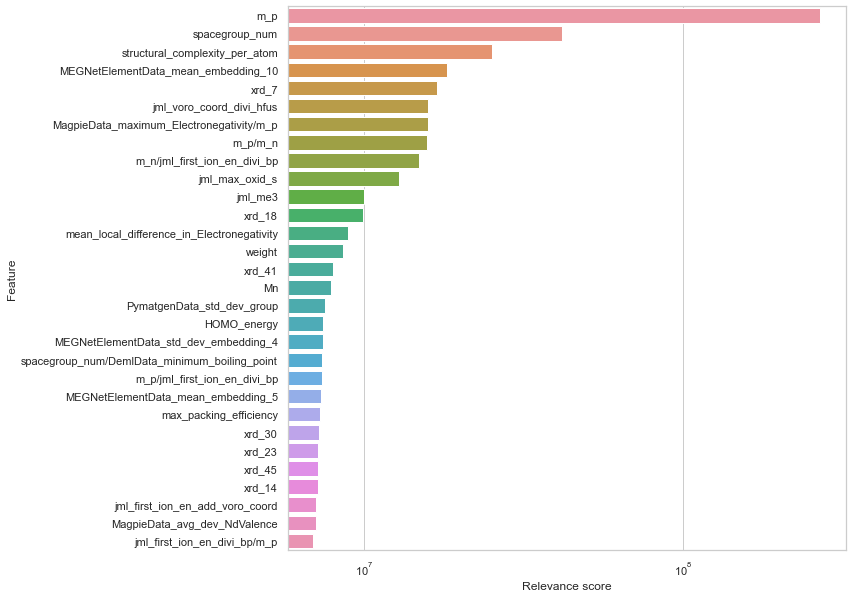

In [8]:
import seaborn as sns

# Generate feature ranking
model = lgbm

feature_score = pd.DataFrame({'feature': features, 'relevance_score': model.feature_importances_})
feature_score = feature_score.sort_values(by = 'relevance_score', ascending = False)
feature_score = feature_score.reset_index(drop = True)

#Plot data of feature relevance 
sns.set(rc = {'figure.figsize':(10, 10)})
sns.set_style("whitegrid")

# Number of features to plot
no_of_features = 30

fig = sns.barplot(x = 'relevance_score', y = 'feature', data = feature_score[:no_of_features])
fig.set_xscale("log")
fig.set(xlabel = 'Relevance score', ylabel = 'Feature')

# plt.savefig('feature_relevance_plot_experimental_bayesian_scaffold_split_v2.png', dpi = 300)